In [1]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg

--2022-12-14 16:02:02--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.42
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.7MB/s    in 1.4s    

2022-12-14 16:02:04 (19.7 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2022-12-14 16:02:04--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/soaps.jpeg [followi

## **Adding Film Grain or Noise to Images**

In [5]:
def addWhiteNoise(image):
  prob = random.uniform(0.05, 0.1)

  rnd = np.random.rand(image.shape[0], image.shape[1])

  image[rnd < prob] = np.random.randint(50,230)
  return image

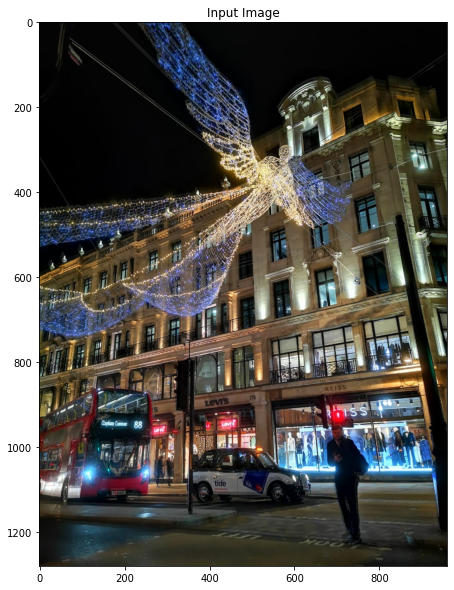

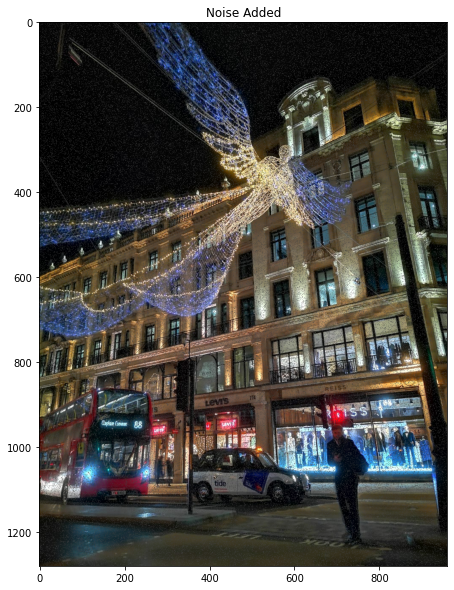

In [6]:
image = cv2.imread('/content/images/londonxmas.jpeg')
imshow("Input Image", image)

noise_1 = addWhiteNoise(image)
imshow("Noise Added", noise_1)

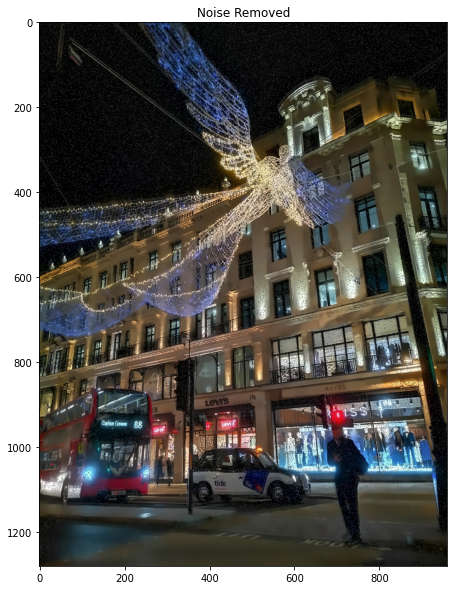

In [8]:
dst = cv2.fastNlMeansDenoisingColored(noise_1, None, 11, 6, 7, 21)

imshow("Noise Removed", dst)

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.


### **Using Histogram Qualization** 

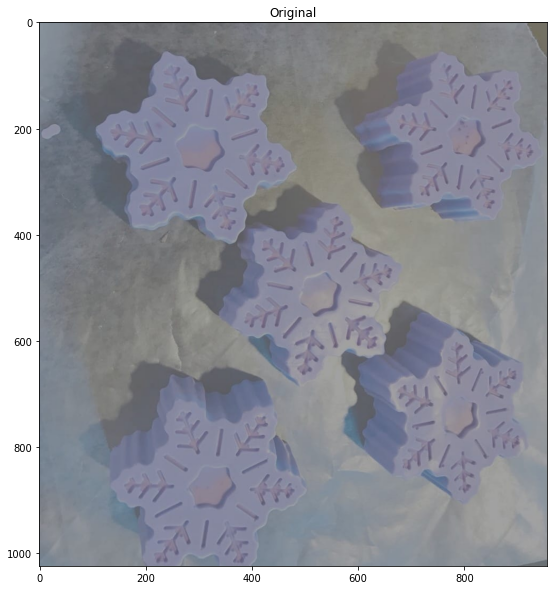

<ipython-input-9-392dbf5fc476>:15: MatplotlibDeprecationWarning: Unrecognized location 'upper ;eft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(('cdf','histogram'), loc = 'upper ;eft')


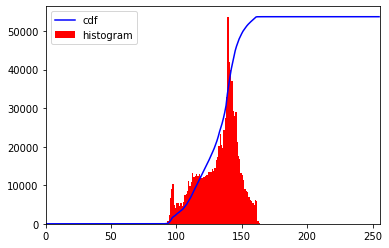

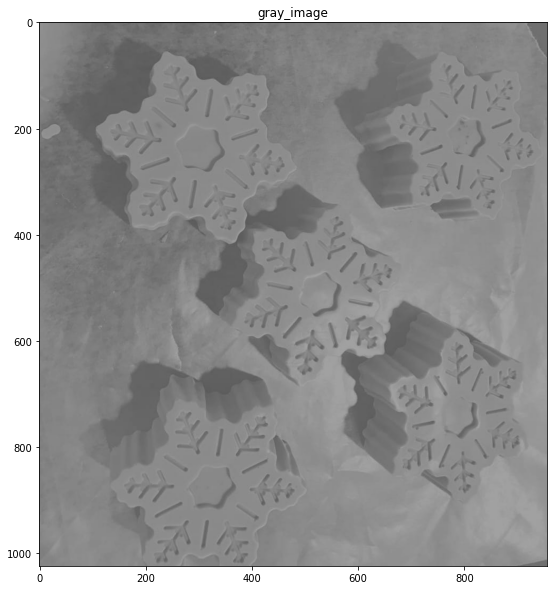

In [9]:
img = cv2.imread('soaps.jpeg')
imshow('Original', img)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

cdf = hist.cumsum()

cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color ='r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper ;eft')
plt.show()
imshow('gray_image', gray_image)

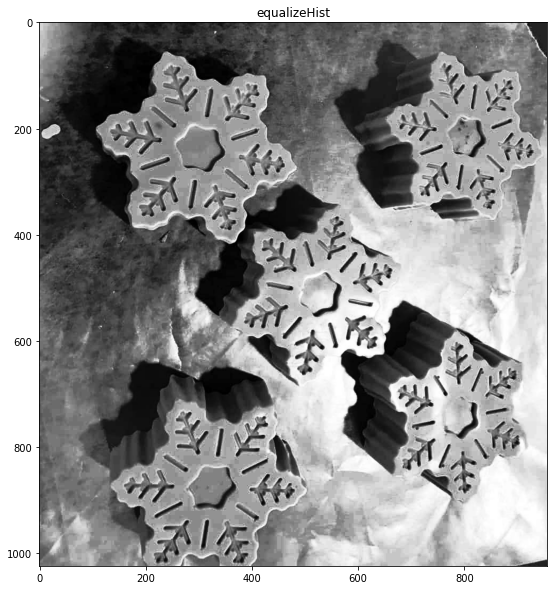

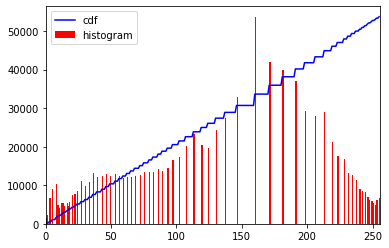

In [10]:
img = cv2.imread('soaps.jpeg')

# Convert to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Equalize our Histogram
gray_image = cv2.equalizeHist(gray_image)
imshow("equalizeHist", gray_image)

# Create our histogram distribution
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])

# Get the Cumulative Sum 
cdf = hist.cumsum()

# Get a normalize cumulative distribution
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# Plot our CDF overlaid onto our Histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


Equlize all RGB (BGR) channels of this image and then merge them together to obtain an equlized color image.

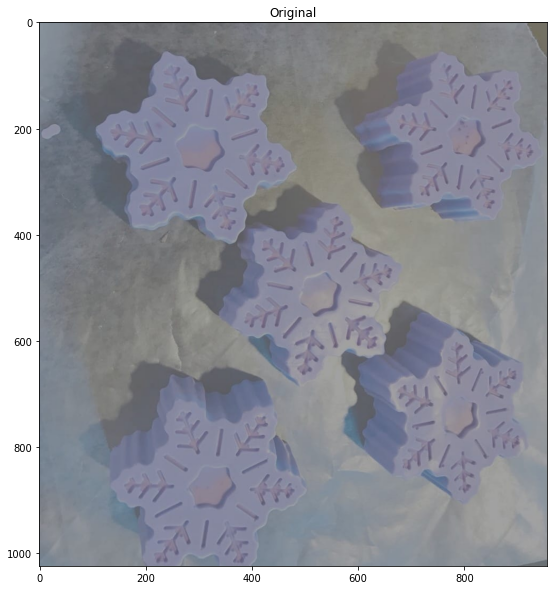

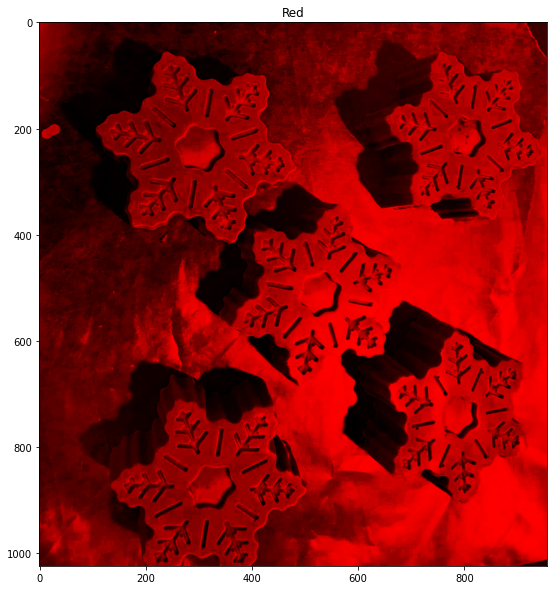

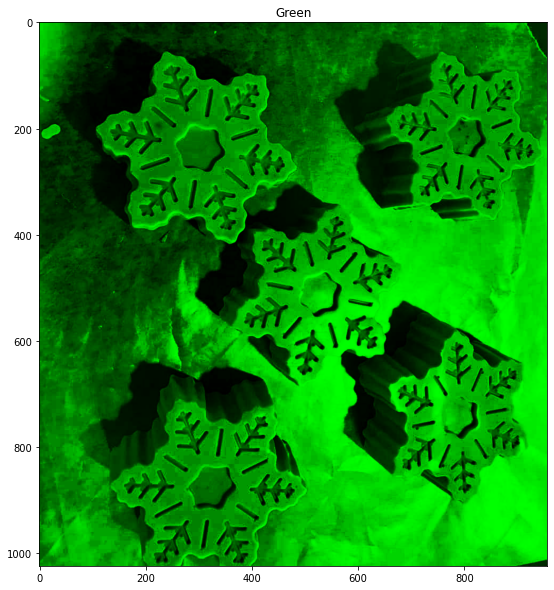

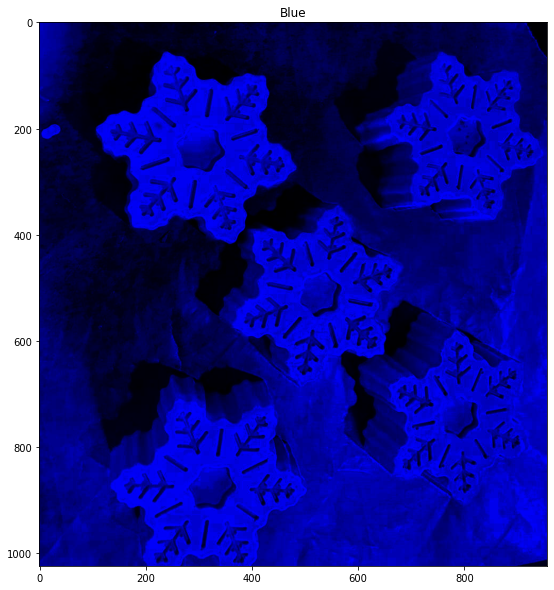

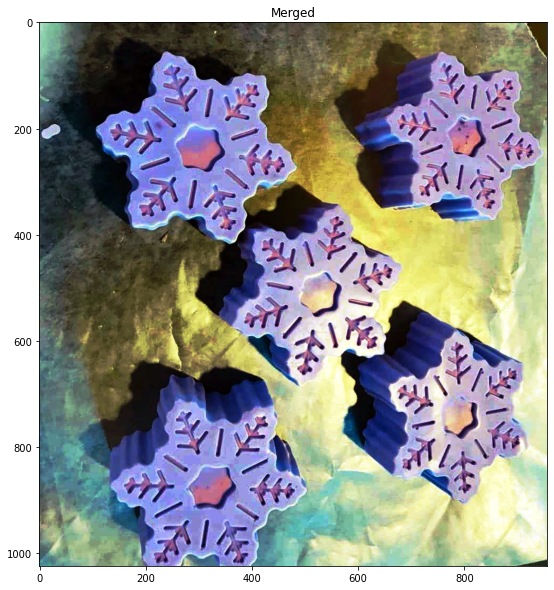

In [11]:
import cv2 
 
img = cv2.imread('soaps.jpeg')
 
imshow("Original", img)
 
# Equalize our Histogram
# Default color format is BGR 
 
red_channel = img[:, :, 2]
red = cv2.equalizeHist(red_channel)
 
green_channel = img[:, :, 1]
green = cv2.equalizeHist(green_channel)
 
blue_channel = img[:, :, 0]
blue = cv2.equalizeHist(blue_channel)
 
# create empty image with same shape as that of src image
red_img = np.zeros(img.shape)
red_img[:,:,2] = red
red_img = np.array(red_img, dtype=np.uint8)
imshow("Red", red_img)
 
green_img = np.zeros(img.shape)
green_img[:,:,1] = green
green_img = np.array(green_img, dtype=np.uint8)
imshow("Green", green_img)
 
blue_img = np.zeros(img.shape)
blue_img[:,:,0] = blue
blue_img = np.array(blue_img, dtype=np.uint8)
imshow("Blue", blue_img)
 
merged = cv2.merge([blue, green, red])
imshow("Merged", merged)